<a href="https://colab.research.google.com/github/Inamurakonoha/Prog2kakushin/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##広島市内のAEDの場所を検索

#csvファイルの読み込み

In [61]:
!wget "https://hiroshima-opendata.dataeye.jp/resource_download/10288" -O aed.csv

--2023-12-19 08:32:39--  https://hiroshima-opendata.dataeye.jp/resource_download/10288
Resolving hiroshima-opendata.dataeye.jp (hiroshima-opendata.dataeye.jp)... 13.231.64.5, 52.195.32.164
Connecting to hiroshima-opendata.dataeye.jp (hiroshima-opendata.dataeye.jp)|13.231.64.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224335 (219K) [text/plain]
Saving to: ‘aed.csv’

aed.csv             100%[===================>] 219.08K   608KB/s    in 0.4s    

2023-12-19 08:32:40 (608 KB/s) - ‘aed.csv’ saved [224335/224335]



##pandas

In [62]:
import pandas as pd

df = pd.read_csv("aed.csv")
df = df[0:667]
df

,都道府県コード又は市区町村コード,NO,都道府県名,市区町村名,名称,名称_カナ,住所,方書,緯度,経度,...,内線番号,法人番号,団体名,利用可能曜日,開始時間,終了時間,利用可能日時特記事項,小児対応設備の有無,URL,備考
0,341002.0,1.0,広島県,広島市,市役所本庁舎 行政棟,NaN,広島市中区国泰寺町1-6-34,NaN,34.385258,132.455375,...,NaN,NaN,広島市,月火水木金土日,00:00,24:00,平日：24時間 土曜：24時間 ／ 日曜：24時間 ／ 祝日：24時間,,NaN,NaN
1,341002.0,2.0,広島県,広島市,市役所本庁舎 議会棟,NaN,広島市中区国泰寺町1-6-34,NaN,34.385258,132.455375,...,NaN,NaN,広島市,月火水木金,8:30,17:15,平日：8:30～17:15 土曜：× ／ 日曜：× ／ 祝日：×,,NaN,NaN
2,341002.0,3.0,広島県,広島市,北庁舎別館,NaN,広島市中区国泰寺町1-4-15,NaN,34.386188,132.455354,...,NaN,NaN,広島市,月火水木金,8:30,17:15,平日：8:30～17:15 土曜：× ／ 日曜：× ／ 祝日：×,,NaN,NaN
3,341002.0,4.0,広島県,広島市,広島市立大学,NaN,広島市安佐南区大塚東3-4-1,NaN,34.439485,132.415603,...,NaN,NaN,-,月火水木金,7:30,20:00,平日：7:30～20:00 土曜：× ／ 日曜：× ／ 祝日：×,,NaN,NaN
4,341002.0,5.0,広島県,広島市,広島市研修センター,NaN,広島市東区牛田新町1-17-1,NaN,34.418934,132.472540,...,NaN,NaN,広島市,月火水木金,8:30,17:15,平日：8:30～17:15 土曜：× ／ 日曜：× ／ 祝日：×,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,341002.0,663.0,広島県,広島市,利松児童館,NaN,広島市佐伯区利松1-10-7,NaN,34.395740,132.364246,...,NaN,NaN,広島市,月火水木金土日,13:00,18:30,平日：13:00～18:30 土曜：8:30～17:00（第2土曜日は10:00～16:00...,,NaN,NaN
663,341002.0,664.0,広島県,広島市,坪井児童館,NaN,広島市佐伯区坪井1-32-9,NaN,34.373741,132.350658,...,NaN,NaN,広島市,月火水木金土日,13:00,18:30,平日：13:00～18:30 土曜：8:30～17:00（第2土曜日は10:00～16:00...,,NaN,NaN
664,341002.0,665.0,広島県,広島市,五日市中央児童館,NaN,広島市佐伯区五日市中央3-12-2,NaN,34.369281,132.352294,...,NaN,NaN,広島市,月火水木金土日,13:00,18:30,平日：13:00～18:30 土曜：8:30～17:00（第2土曜日は10:00～16:00...,,NaN,NaN
665,341002.0,666.0,広島県,広島市,原児童館,NaN,広島市安佐南区西原4-23-35,NaN,34.437588,132.470770,...,NaN,NaN,広島市,月火水木金土日,13:00,18:30,平日：13:00～18:30 土曜：8:30～17:00（第2土曜日は10:00～16:00...,有,NaN,NaN


##検索

---------------------

1 : 場所名で検索

2 : 施設で検索

---------------------
検索方法を上記の番号で入力 : 1
AEDを探したい場所名を入力 : 毘沙門台


                 名称                 住所
201  アストラムライン 毘沙門台駅  広島市安佐南区毘沙門台1-7-45
446         毘沙門台小学校   広島市安佐南区毘沙門台3-1-1




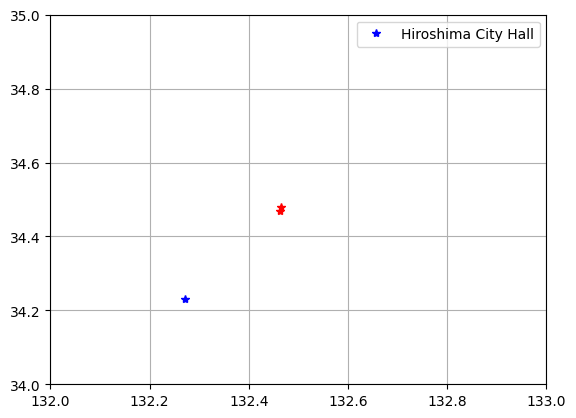

In [70]:
from matplotlib import pyplot as plt

print("---------------------\n")

print("1 : 場所名で検索\n")
print("2 : 施設で検索\n")

print("---------------------")


num = input("検索方法を上記の番号で入力 : ")

if num == "1" :
  place = input("AEDを探したい場所名を入力 : ")
  print()
  print()
  df2 = df[df["住所"].str.contains(place)][["名称","住所"]]
  print(df2)
  print()
  print()
  df3 = df[df["住所"].str.contains(place)][["緯度","経度"]]

  plt.plot(df3["経度"],df3["緯度"],"*",color="red")
  plt.plot(132.2719,34.2307,"*",color="blue",label="Hiroshima City Hall")
  plt.xlim(132.0,133.0)
  plt.ylim(34.0,35.0)
  plt.legend()
  plt.grid()
  plt.show()

elif num == "2" :
  fac = input("AEDを探したい施設名を入力 : ")
  print()
  print()
  df2 = df[df["名称"].str.contains(fac)][["名称","住所"]]
  print(df2)
  print()
  print()

  df3 = df[df["住所"].str.contains(fac)][["緯度","経度"]]

  plt.plot(df3["経度"],df3["緯度"],"*",color="red")
  plt.plot(132.2719,34.2307,"*",color="blue",label="Hiroshima City Hall")
  plt.xlim(132.0,133.0)
  plt.ylim(34.0,35.0)
  plt.legend()
  plt.grid()
  plt.show()